### **Pastikan keseluruhan library berikut sudah terinstal dalam environtment**

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm.auto import tqdm
import pyarrow.parquet as pq

In [ ]:
# Jalankan ini di cell notebook jika anda menjalankan jupyter menggunakan akses root
!apt-get update && apt-get install -y wget

**Contoh tanda anda sedang berada di akses root**

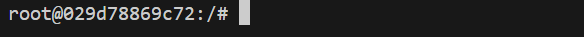

In [ ]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-11.parquet

In [ ]:
!wget https://github.com/DataTalksClub/nyc-tlc-data/releases/download/misc/taxi_zone_lookup.csv

In [ ]:
# Membuat koneksi ke database PostgreSQL
engine = create_engine('...')  # Ganti dengan string koneksi database Anda

In [ ]:
green_tripdata_parquet_file = pq.ParquetFile('green_tripdata_2025-11.parquet')

### **Apabila file parquet berukuran besar, silahkan gunakan code dibawah ini untuk melakukan batch input ke postgreSQL**

In [ ]:
# total_rows = green_tripdata_parquet_file.metadata.num_rows
# batch_size = 10000

# first = True

# for batch in tqdm(green_tripdata_parquet_file.iter_batches(batch_size=batch_size), total=(total_rows // batch_size) + 1):
    
#     # Ubah batch ke pandas DataFrame
#     df_chunk = batch.to_pandas()

#     if first:
#         # Create table schema (mengosongkan tabel jika sudah ada dan membuat skema baru)
#         df_chunk.head(0).to_sql(
#             name="green_taxi_trips_november_2025",
#             con=engine,
#             if_exists="replace",
#             index=False
#         )
#         first = False
#         print("Table created")

#     # Insert chunk data
#     df_chunk.to_sql(
#         name="green_taxi_trips_november_2025",
#         con=engine,
#         if_exists="append",
#         index=False,
#         # Tips: gunakan method='multi' atau chunksize di to_sql untuk speed tambahan
#         method='multi', 
#         chunksize=10000 
#     )

# print(f"Selesai! Total {total_rows} baris telah dimasukkan.")

### **Apabila file parquet berukuran kecil, silahkan gunakan code dibawah ini untuk melakukan input ke postgreSQL**

In [ ]:
# # 1. Konversi seluruh file parquet ke DataFrame
# df = green_tripdata_parquet_file.to_pandas()

# # Create table sschema (mengosongkan tabel jika sudah ada dan membuat skema baru)
# df.head(0).to_sql(
#         name="green_taxi_trips_november_2025",
#         con=engine,
#         if_exists="replace",
#         index=False
#         )
# print("Table created")

# # 2. Kirim ke SQL
# df.to_sql(
#     name="green_taxi_trips_november_2025",
#     con=engine,
#     if_exists="append", 
#     index=False,
#     # Tips: gunakan method='multi' atau chunksize di to_sql untuk speed tambahan
#     method='multi', 
#     chunksize=10000 
# )

# print(f"Selesai! Total {len(df)} baris telah dimasukkan ke database.")
